# 1-D Spin-Chains and Ladder systems
## $\textit{Ground states and excitations}$

Before getting into the weeds of the work you will be doing we will first go through simple models and the features we are most interested in extracting. As the very basics is a Hamiltonian defined like

\begin{equation}
    H = J \sum_i \sigma^z_i\sigma^z_{i+1} + h\sigma^x_i
\end{equation}

In code this is like a graph where energies are evaluated at the vertices $(i)$ or along bonds $(i,j)$. Unlike a classical graph that would have weights between nodes $(i,j)$ that represent some metric, a quantum graph needs to include the Hilbert space of operators due to commutation relations. Is the energy on a bond along the x,y,z direction, or can there be something more complex?

The full Hilbert space that defines all possible connections on this quantum graph is then made from tensor products of the local hilbert space ($q= 2$ for qubit)

\begin{equation}
    \text{Local:  } 
    \begin{bmatrix}
        a^\prime\\
        b^\prime
    \end{bmatrix} = 
    \begin{bmatrix}
        l & m\\
        n & p
    \end{bmatrix}
    \begin{bmatrix}
        a\\
        b
    \end{bmatrix}
\end{equation}

\begin{equation}
    \text{Full:  } 
    \begin{bmatrix}
        2^N
    \end{bmatrix} = 
    \begin{bmatrix}
        l & m\\
        n & p
    \end{bmatrix}^{\otimes_i^N}
    \begin{bmatrix}
        2^N
    \end{bmatrix}
\end{equation}


A tensor product can be more straightforwardly visualized like (EX. tensor product of $2x2$ identity with $2x2$ Pauli matrix)

\begin{equation}
    \mathcal{I} \otimes \sigma^z = 
    \begin{bmatrix}
        \sigma^z & 0\\
        0 & \sigma^z
    \end{bmatrix}
\end{equation}

Or we can have the reverse

\begin{equation}
    \sigma^z \otimes \mathcal{I} = 
    \begin{bmatrix}
        \mathcal{I} & 0\\
        0 & -\mathcal{I} 
    \end{bmatrix}
\end{equation}

So order is indeed important. One is Pauli operator living on the left site vs. the right site. Now in order to create the Hamiltonian, we simply do the raw matrix multiplication for all of the operators that are defined

\begin{equation}
    h\sigma_i = h \mathcal{I}^{\otimes_0^{i-1}} \otimes \sigma^x \otimes \mathcal{I}^{\otimes_{i+1}^{N}}
\end{equation}
\begin{equation}
    J\sigma_i\sigma_{i+1} = \mathcal{I}^{\otimes_0^{i-1}} \otimes \sigma^z \otimes \sigma^z \otimes \mathcal{I}^{\otimes_{i+2}^{N}}
\end{equation}


This is the most inefficient way to represent the Hamiltonian. 

$\color{red}{\text{What is the largest possible system size that can be stored in memory on a typical laptop vs supercomputer?}}$

Below we implement the above Ising Hamiltonian. One quantity we are most interested in is are the energies, or eigenvalues of the Hamiltonian. Please REVIEW these ideas from linear algebra and quantum mechanics if this is unfamiliar. In order to determine the eigenvalues we must diagonalize the full Hamiltonian matrix.

$\color{red}{\text{What is the runtime of fully diagonalizing a matrix?: N, N^2, N^3...?}}$

The following code determines the Ising ground state energy from a finite system and variable $[J,h]$.

$\color{red}{\text{Plot for fixed J the eigenenergies of 10 different h values from 0-3. Label your plot accordingly.}}$

In [4]:
def ising_finite_gs_energy(L, J, g):
    sx = sparse.csr_matrix(np.array([[0., 1.], [1., 0.]]))
    sz = sparse.csr_matrix(np.array([[1., 0.], [0., -1.]]))
    id = sparse.csr_matrix(np.eye(2))
    sx_list = []
    sz_list = []
    for i_site in range(L):
        x_ops = [id] * L
        z_ops = [id] * L
        x_ops[i_site] = sx
        z_ops[i_site] = sz
        X = x_ops[0]
        Z = z_ops[0]
        for j in range(1, L):
            X = sparse.kron(X, x_ops[j], 'csr')
            Z = sparse.kron(Z, z_ops[j], 'csr')
        sx_list.append(X)
        sz_list.append(Z)
    H_xx = sparse.csr_matrix((2**L, 2**L))
    H_z = sparse.csr_matrix((2**L, 2**L))
    for i in range(L - 1):
        H_xx = H_xx + sx_list[i] * sx_list[(i + 1) % L]
    for i in range(L):
        H_z = H_z + sz_list[i]
    H = -J * H_xx - g * H_z
    E = arp.eigs(H)
    return E[0]

def ising_finite_gs(L, J, g):
    sx = sparse.csr_matrix(np.array([[0., 1.], [1., 0.]]))
    sz = sparse.csr_matrix(np.array([[1., 0.], [0., -1.]]))
    id = sparse.csr_matrix(np.eye(2))
    sx_list = []
    sz_list = []
    for i_site in range(L):
        x_ops = [id] * L
        z_ops = [id] * L
        x_ops[i_site] = sx
        z_ops[i_site] = sz
        X = x_ops[0]
        Z = z_ops[0]
        for j in range(1, L):
            X = sparse.kron(X, x_ops[j], 'csr')
            Z = sparse.kron(Z, z_ops[j], 'csr')
        sx_list.append(X)
        sz_list.append(Z)
    H_xx = sparse.csr_matrix((2**L, 2**L))
    H_z = sparse.csr_matrix((2**L, 2**L))
    for i in range(L - 1):
        H_xx = H_xx + sx_list[i] * sx_list[(i + 1) % L]
    for i in range(L):
        H_z = H_z + sz_list[i]
    H = -J * H_xx - g * H_z
    E, V = arp.eigsh(H, which='SA')
    return E[0], V[:,0]

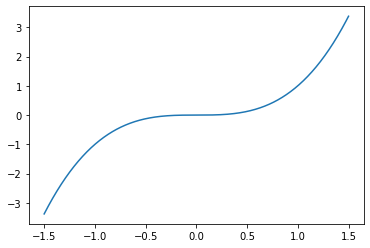

In [5]:
#### Example plotting using matplotlib

x = np.linspace(-1.5, 1.5, 1000);
y = lambda x: x**3.0
plt.plot(x, y(x));